**Regresion Linear Simple**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
# Load the dataset
data = pd.read_csv('BostonHousing.csv')

data_ = data.loc[:,['lstat','medv']]
print(data_.head(5))

   lstat  medv
0   4.98  24.0
1   9.14  21.6
2   4.03  34.7
3   2.94  33.4
4   5.33  36.2


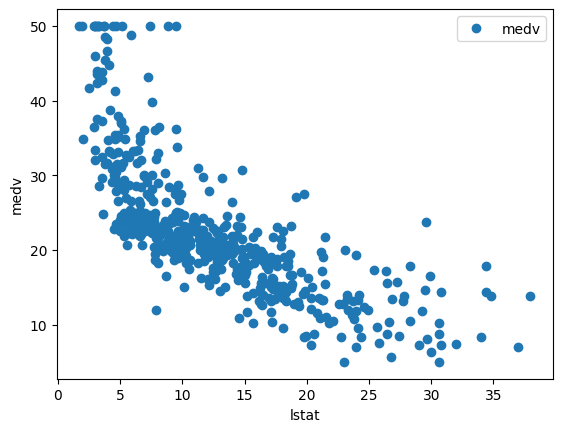

In [ ]:
data.plot(x='lstat', y='medv', style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

In [ ]:
# Split the dataset into training and testing sets
X = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print('Intercept:',model.intercept_)
print('Coef:',model.coef_)

Intercept: [34.33497839]
Coef: [[-0.92441715]]


In [ ]:
# Calculate train and test scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print('Train score:', train_score)
print('Test score:', test_score)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))
# Make predictions on the testing data
y_pred = model.predict(X_test)

Train score: 0.5495280791456811
Test score: 0.5244757432765152
Cross-validation scores: [0.54729984 0.49002001 0.5381464  0.56213521 0.55465176]
Mean cross-validation score: 0.538450646821911


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 5.078127727696937
Mean Squared Error: 46.994820919547124
Root Mean Squared Error: 6.855276866731724


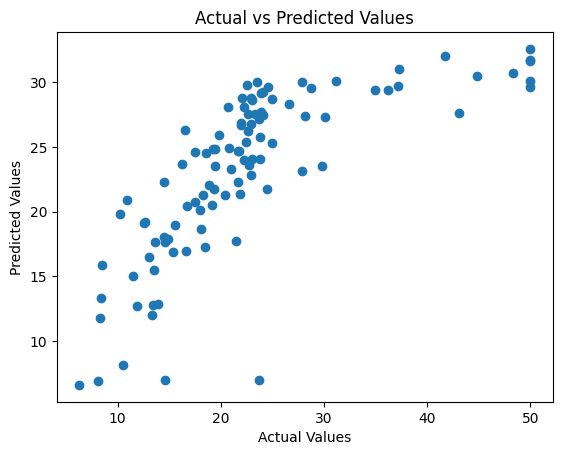

In [ ]:
# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

**Regresion Linear Multiple**

In [ ]:
dataset = pd.read_csv('BostonHousing.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
X = pd.DataFrame(dataset.iloc[:,:-1])
Y = pd.DataFrame(dataset.iloc[:,-1])

print(X)
print(Y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [ ]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

,Attribute,Co-efficient
0,crim,-0.130800
1,zn,0.049403
2,indus,0.001095
3,chas,2.705366
4,nox,-15.957050
5,rm,3.413973
6,age,0.001119
7,dis,-1.493081
8,rad,0.364422
9,tax,-0.013172


In [ ]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,37.563118
1,32.144451
2,27.065736
3,5.670806
4,35.099826
...,...
97,21.912956
98,22.394774
99,13.193354
100,23.969911


In [ ]:
y_test

,medv
226,37.6
292,27.9
90,22.6
373,13.8
273,35.2
...,...
349,26.6
212,22.4
156,13.1
480,23.0


In [ ]:
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error:  3.2132704958423735
Mean squared error:  20.869292183770686
Root mean squared error:  4.568292042303193


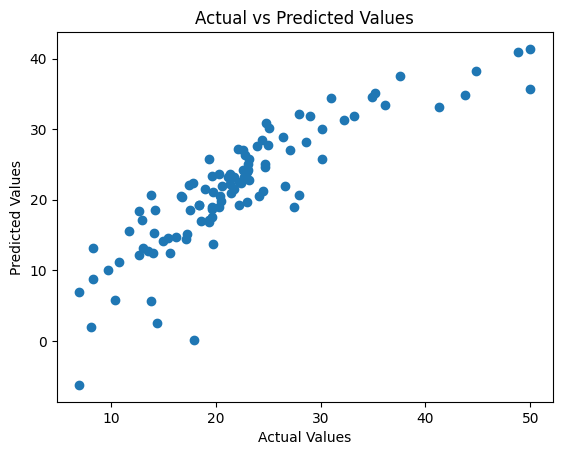

In [ ]:
# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

**Ridge**

Error cuadrático medio en el conjunto de prueba: 24.48
Train Score:  0.7487825119234438
Test Score:  0.666222167016852
Cross Validation Score:  [0.76591309 0.62333456 0.75782611 0.78614833 0.66904975]
Mean Cross Validation Score:  0.7204543680806568


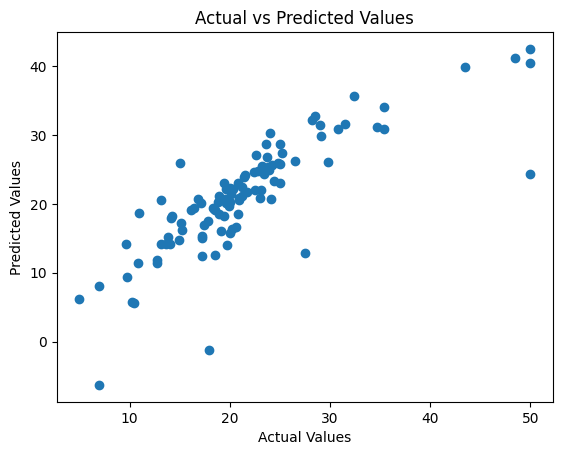

In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('BostonHousing.csv')
target_variable_name = 'medv'  
X = df.drop(target_variable_name, axis=1).values
y = df[target_variable_name].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

cv_score = cross_val_score(ridge, X_train, y_train, cv=5)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en el conjunto de prueba: {mse:.2f}")
print("Train Score: ", train_score)
print("Test Score: ", test_score)
print("Cross Validation Score: ", cv_score)
print("Mean Cross Validation Score: ", cv_score.mean())

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

**Lasso**

Error cuadrático medio en el conjunto de prueba: 24.41
Train Score:  0.6959153721670908
Test Score:  0.6671453631686304
Cross Validation Score:  [0.66633307 0.65963238 0.69617488 0.72469255 0.60315946]
Mean Cross Validation Score:  0.6699984678628258


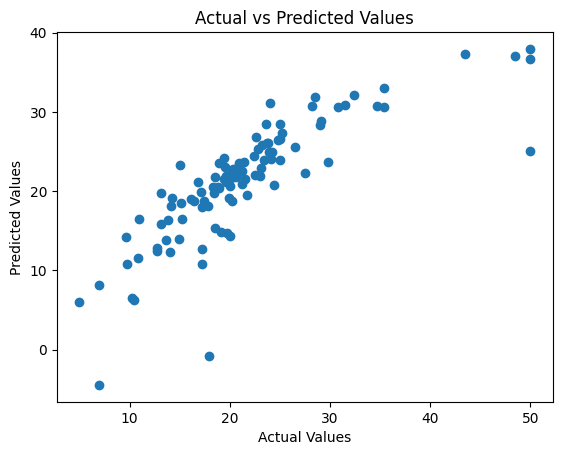

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('BostonHousing.csv')

target_variable_name = 'medv'  
X = df.drop(target_variable_name, axis=1).values
y = df[target_variable_name].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=1.0)  
lasso.fit(X_train, y_train)

train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)

cv_score = cross_val_score(lasso, X_train, y_train, cv=5)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en el conjunto de prueba: {mse:.2f}")
print("Train Score: ", train_score)
print("Test Score: ", test_score)
print("Cross Validation Score: ", cv_score)
print("Mean Cross Validation Score: ", cv_score.mean())

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()